<a href="https://colab.research.google.com/github/spatank/CIS-522/blob/main/Homework/HW_9_SPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 9 Homework

In [1]:
#@markdown What is your Pennkey and pod? (text, not numbers, e.g. bfranklin)
my_pennkey = 'spatank' #@param {type:"string"}
my_pod = 'sublime-newt' #@param ['Select', 'euclidean-wombat', 'sublime-newt', 'buoyant-unicorn', 'lackadaisical-manatee','indelible-stingray','superfluous-lyrebird','discreet-reindeer','quizzical-goldfish','astute-jellyfish','ubiquitous-cheetah','nonchalant-crocodile','fashionable-lemur','spiffy-eagle','electric-emu','quotidian-lion']


## Section 1: Role of social media platforms in mitigating hate speech

Social media platforms have instituted not just user policies for online conduct, but also technological mechanisms to identify and remove hate speech.  As an example, review Facebook’s discussion of how its employing AI to identify hate speech.  As you read this article, pay particular attention to the specific challenges they enumerate in identifying hate speech. 

"AI advances to better detect hate speech" 

https://ai.facebook.com/blog/ai-advances-to-better-detect-hate-speech/

*Facebook, 2020* [10-minute read]

The Facebook article emphasizes that the challenges to identifying hate speech are both social and technological.  The social considerations include the importance of cultural context as well as the nuances of languages. How does that resonate with the "Excavating AI: The Politics of Images in Machine Learning Training Sets" article you read in Week 6?  What do you think of Facebook’s approach? (200-300 words)

In [2]:
section1_ans = "One of the key takeaways of the Excavating AI article was how devoid of context as well as error-prone training data can be. The authors discuss examples from the ImageNet data set that are at best misclassified and at worst problematic. A child dressed in tattered clothes clutching a doll is labelled a \"toy\", while a pregnant woman with her hand on her stomach is labelled a \"snob\". Facebook attempts to go around this problem by employing a self-supervised pre-training approach. Instead of relying on human (mis-)labelled data, Facebook AI uses multi-modal training data to generate embeddings that are then fine-tuned downstream to fit a specific task. Additionally, Facebook AI's approach is a step in the right direction as far as contextually better-rounded systems go. They want to incorporate multiple data modalities when determining whether an instance is hate speech or not. This would mean that images are accompanied by text as well as other information such as their captions and counter-speech in associated comments. A training image with an incorrect label is automatically down-weighted in importance when its associated text reveals more context-specific information. Facebook AI also uncovers pre-trained embeddings that are shared across different languages. As a result, hate speech in English and German ends up living closer together in the embedding space than other forms of speech. This allows transfer learning to take place between languages. For a language for which there is little to no training data available, the shared embedding space is likely the only tool available to detect hate speech." #@param {type:"string"}

## Section 2: Broader societal considerations of addressing hate speech on social media


Next, read this Medium article about the unintended consequences of technological interventions to address hate speech on social media.

"How Automated Tools Discriminate Against Black Language"    
https://medium.com/@annawchung/how-automated-tools-discriminate-against-black-language-2ac8eab8d6db.  
*Medium, 2019* [14-minute read]

"Challenges in Automated Debiasing for Toxic Language Detection"    
https://arxiv.org/pdf/2102.00086.pdf.  
*Optional – this is much longer and more technical!!!*

How does this example illustrate the complexity of identifying hate speech?  What solutions does the author suggest? Why is it important that AI practitioners have a robust understanding of the societal context and consequence of their work? (1-2 paragraphs)

In [3]:
section2_ans = 'This example focusses on the difficulties introduced by dialects of languages used by minorities. If the training data does not contain a diverse enough representation of dialects, it is likely that an ML model trained on this data will be biased towards the way a majority uses a language. The author suggests that it is important for developers in such instances to document the biases in their technologies and be transparent about them to end-users. On a more systemic level, the author suggests increasing diversity in the training data. Finally, the author recommends institutional changes to reduce barriers to entry in tech fields for minorities. This last measure has the most significant knock-on effect on deployed technology since diversity amongst developers translates into diversity in outcomes. People who use minority dialects are more likely to notice that biased algorithms mislabel instances from these dialects, and then act to fix the technology.' #@param {type:"string"}

## Section 3: Ablation Study on LSTMs

In the tutorials we learnt about the different gates in LSTMs. We also learnt about GRUs that have fewer components than LSTMs but work reasonably well. In this section of the homework you will conduct an ablation study for LSTMs. You will be working on text generation task. The model will be trained on H. G. Wells’ *The Time Machine*.

In order to have a baseline, first intialize the weights and implement the gates of a LSTM. 

For the ablation study change different components listed below (these are suggestions, you are free to use your own ideas as well) and observe the effects on performance. 
- Initialization
- Number of gates
- Replacing sigmoid, tanh with other functions
- Changing the inputs used for each recurrent unit

You will make changes in the `get_lstm_params` and `lstm` functions. We have provided code for forward and backward propagation, training and a sample code to see the text generation results. 
(Please remember to to return tensors with the same shape as the LSTM you will implement to ensure end to end training.)

In [4]:
#@title Imports
!pip install d2l

import torch
from torch import nn
from d2l import torch as d2l
from torch.nn import functional as F
import math

     |████████████████████████████████| 81kB 3.5MB/s 


In [5]:
# def get_lstm_params(vocab_size, num_hiddens):
#   num_inputs = num_outputs = vocab_size
#   # Input gate parameters
#   W_xi = torch.randn(num_inputs, num_hiddens) * 0.01
#   W_hi = torch.randn(num_hiddens, num_hiddens) * 0.01
#   b_i = torch.zeros(num_hiddens)
#   # Forget gate parameters
#   W_xf = torch.randn(num_inputs, num_hiddens) * 0.01
#   W_hf = torch.randn(num_hiddens, num_hiddens) * 0.01
#   b_f = torch.zeros(num_hiddens)
#   # Output gate parameters
#   W_xo = torch.randn(num_inputs, num_hiddens) * 0.01
#   W_ho = torch.randn(num_hiddens, num_hiddens) * 0.01
#   b_o = torch.zeros(num_hiddens)
#   # Candidate memory cell parameters
#   W_xc = torch.randn(num_inputs, num_hiddens) * 0.01
#   W_hc = torch.randn(num_hiddens, num_hiddens) * 0.01
#   b_c = torch.zeros(num_hiddens)
#   # Output layer parameters
#   W_hq = torch.randn(num_hiddens, num_outputs) * 0.01
#   b_q = torch.zeros(num_outputs)
#   # List all the parameters and attach gradients
#   params = [W_xi, W_hi, b_i, 
#             W_xf, W_hf, b_f, 
#             W_xo, W_ho, b_o, 
#             W_xc, W_hc, b_c,
#             W_hq, b_q]
#   for param in params:
#       param.requires_grad_(True)
#   return params

# def get_lstm_params_input_augmented(vocab_size, num_hiddens):
#   num_inputs = num_outputs = vocab_size
#   # Input gate parameters
#   W_xi = torch.randn(num_inputs + num_hiddens, num_hiddens) * 0.01
#   W_hi = torch.randn(num_hiddens, num_hiddens) * 0.01
#   b_i = torch.zeros(num_hiddens)
#   # Forget gate parameters
#   W_xf = torch.randn(num_inputs + num_hiddens, num_hiddens) * 0.01
#   W_hf = torch.randn(num_hiddens, num_hiddens) * 0.01
#   b_f = torch.zeros(num_hiddens)
#   # Output gate parameters
#   W_xo = torch.randn(num_inputs + num_hiddens, num_hiddens) * 0.01
#   W_ho = torch.randn(num_hiddens, num_hiddens) * 0.01
#   b_o = torch.zeros(num_hiddens)
#   # Candidate memory cell parameters
#   W_xc = torch.randn(num_inputs + num_hiddens, num_hiddens) * 0.01
#   W_hc = torch.randn(num_hiddens, num_hiddens) * 0.01
#   b_c = torch.zeros(num_hiddens)
#   # Output layer parameters
#   W_hq = torch.randn(num_hiddens, num_outputs) * 0.01
#   b_q = torch.zeros(num_outputs)
#   # List all the parameters and attach gradients
#   params = [W_xi, W_hi, b_i, 
#             W_xf, W_hf, b_f, 
#             W_xo, W_ho, b_o, 
#             W_xc, W_hc, b_c,
#             W_hq, b_q]
#   for param in params:
#       param.requires_grad_(True)
#   return params

# def get_lstm_params_minus_forget(vocab_size, num_hiddens):
#   num_inputs = num_outputs = vocab_size
#   # Input gate parameters
#   W_xi = torch.randn(num_inputs, num_hiddens) * 0.01
#   W_hi = torch.randn(num_hiddens, num_hiddens) * 0.01
#   b_i = torch.zeros(num_hiddens)
#   # Output gate parameters
#   W_xo = torch.randn(num_inputs, num_hiddens) * 0.01
#   W_ho = torch.randn(num_hiddens, num_hiddens) * 0.01
#   b_o = torch.zeros(num_hiddens)
#   # Candidate memory cell parameters
#   W_xc = torch.randn(num_inputs, num_hiddens) * 0.01
#   W_hc = torch.randn(num_hiddens, num_hiddens) * 0.01
#   b_c = torch.zeros(num_hiddens)
#   # Output layer parameters
#   W_hq = torch.randn(num_hiddens, num_outputs) * 0.01
#   b_q = torch.zeros(num_outputs)
#   # List all the parameters and attach gradients
#   params = [W_xi, W_hi, b_i, 
#             W_xo, W_ho, b_o, 
#             W_xc, W_hc, b_c,
#             W_hq, b_q]
#   for param in params:
#       param.requires_grad_(True)
#   return params

# def get_lstm_params_Xavier_init(vocab_size, num_hiddens):
#   num_inputs = num_outputs = vocab_size
#   # Input gate parameters
#   W_xi = torch.Tensor(num_inputs, num_hiddens) 
#   W_hi = torch.Tensor(num_hiddens, num_hiddens) 
#   b_i = torch.Tensor(num_hiddens)
#   # Forget gate parameters
#   W_xf = torch.Tensor(num_inputs, num_hiddens) 
#   W_hf = torch.Tensor(num_hiddens, num_hiddens) 
#   b_f = torch.Tensor(num_hiddens)
#   # Output gate parameters
#   W_xo = torch.Tensor(num_inputs, num_hiddens) 
#   W_ho = torch.Tensor(num_hiddens, num_hiddens) 
#   b_o = torch.Tensor(num_hiddens)
#   # Candidate memory cell parameters
#   W_xc = torch.Tensor(num_inputs, num_hiddens) 
#   W_hc = torch.Tensor(num_hiddens, num_hiddens) 
#   b_c = torch.Tensor(num_hiddens)
#   # Output layer parameters
#   W_hq = torch.Tensor(num_hiddens, num_outputs) 
#   b_q = torch.Tensor(num_outputs)
#   sigma = 1.0/math.sqrt(num_hiddens) # for initialization
#   # List all the parameters and attach gradients
#   params = [W_xi, W_hi, b_i, 
#             W_xf, W_hf, b_f, 
#             W_xo, W_ho, b_o, 
#             W_xc, W_hc, b_c,
#             W_hq, b_q]
#   for param in params:
#     # Xavier initialization
#     param.data.uniform_(-sigma, sigma)
#     param.requires_grad_(True)
#   return params

def get_lstm_params_choice(vocab_size, num_hiddens):
  num_inputs = num_outputs = vocab_size
  # Input gate parameters
  W_xi = torch.Tensor(num_inputs + num_hiddens, num_hiddens) 
  W_hi = torch.Tensor(num_hiddens, num_hiddens) 
  b_i = torch.Tensor(num_hiddens)
  # Forget gate parameters
  W_xf = torch.Tensor(num_inputs + num_hiddens, num_hiddens) 
  W_hf = torch.Tensor(num_hiddens, num_hiddens) 
  b_f = torch.Tensor(num_hiddens)
  # Output gate parameters
  W_xo = torch.Tensor(num_inputs + num_hiddens, num_hiddens) 
  W_ho = torch.Tensor(num_hiddens, num_hiddens) 
  b_o = torch.Tensor(num_hiddens)
  # Candidate memory cell parameters
  W_xc = torch.Tensor(num_inputs + num_hiddens, num_hiddens) 
  W_hc = torch.Tensor(num_hiddens, num_hiddens) 
  b_c = torch.Tensor(num_hiddens)
  # Output layer parameters
  W_hq = torch.Tensor(num_hiddens, num_outputs) 
  b_q = torch.Tensor(num_outputs)
  sigma = 1.0/math.sqrt(num_hiddens) # for initialization
  # List all the parameters and attach gradients
  params = [W_xi, W_hi, b_i, 
            W_xf, W_hf, b_f, 
            W_xo, W_ho, b_o, 
            W_xc, W_hc, b_c,
            W_hq, b_q]
  for param in params:
    # Xavier initialization
    param.data.uniform_(-sigma, sigma)
    param.requires_grad_(True)
  return params

In [6]:
# def lstm(inputs, state, params):
#   # Get the model parameters
#   [W_xi, W_hi, b_i, W_xf, W_hf, b_f, W_xo, W_ho, b_o, W_xc, W_hc, b_c, 
#    W_hq, b_q] = params
#   # Get the hidden and cell state
#   (H, C) = state
#   # Store outputs for each input from a batch
#   outputs = []
#   # For each of the inputs in a batch, perform the LSTM operations
#   for X in inputs:
#     I = torch.sigmoid((X @ W_xi) + (H @ W_hi) + b_i)
#     F = torch.sigmoid((X @ W_xf) + (H @ W_hf) + b_f)
#     O = torch.sigmoid((X @ W_xo) + (H @ W_ho) + b_o)
#     C_tilda = torch.tanh((X @ W_xc) + (H @ W_hc) + b_c)
#     C = F * C + I * C_tilda
#     H = O * torch.tanh(C)
#     Y = (H @ W_hq) + b_q
#     outputs.append(Y)
#   return torch.cat(outputs, dim = 0), (H, C)

# # Input augmentation entails concatenating the input with the previous hidden state
# def lstm_input_augmented(inputs, state, params):
#   # Get the model parameters
#   [W_xi, W_hi, b_i, W_xf, W_hf, b_f, W_xo, W_ho, b_o, W_xc, W_hc, b_c, 
#    W_hq, b_q] = params
#   # Get the hidden and cell state
#   (H, C) = state
#   # Store outputs for each input from a batch
#   outputs = []
#   # For each of the inputs in a batch, perform the LSTM operations
#   for X in inputs:
#     X_and_H = torch.cat((X, H), 1) # input and hidden state concatenated
#     I = torch.sigmoid((X_and_H @ W_xi) + (H @ W_hi) + b_i)
#     F = torch.sigmoid((X_and_H @ W_xf) + (H @ W_hf) + b_f)
#     O = torch.sigmoid((X_and_H @ W_xo) + (H @ W_ho) + b_o)
#     C_tilda = torch.tanh((X_and_H @ W_xc) + (H @ W_hc) + b_c)
#     C = F * C + I * C_tilda
#     H = O * torch.tanh(C)
#     Y = (H @ W_hq) + b_q
#     outputs.append(Y)
#   return torch.cat(outputs, dim = 0), (H, C)

# def lstm_minus_forget(inputs, state, params):
#   # Get the model parameters
#   [W_xi, W_hi, b_i, W_xo, W_ho, b_o, W_xc, W_hc, b_c, W_hq, b_q] = params
#   # Get the hidden and cell state
#   (H, C) = state
#   # Store outputs for each input from a batch
#   outputs = []
#   # For each of the inputs in a batch, perform the LSTM operations
#   for X in inputs:
#     I = torch.sigmoid((X @ W_xi) + (H @ W_hi) + b_i)
#     O = torch.sigmoid((X @ W_xo) + (H @ W_ho) + b_o)
#     C_tilda = torch.tanh((X @ W_xc) + (H @ W_hc) + b_c)
#     C = I * C_tilda
#     H = O * torch.tanh(C)
#     Y = (H @ W_hq) + b_q
#     outputs.append(Y)
#   return torch.cat(outputs, dim = 0), (H, C)

# def lstm_Xavier_init(inputs, state, params):
#   # Get the model parameters
#   [W_xi, W_hi, b_i, W_xf, W_hf, b_f, W_xo, W_ho, b_o, W_xc, W_hc, b_c, 
#    W_hq, b_q] = params
#   # Get the hidden and cell state
#   (H, C) = state
#   # Store outputs for each input from a batch
#   outputs = []
#   # For each of the inputs in a batch, perform the LSTM operations
#   for X in inputs:
#     I = torch.sigmoid((X @ W_xi) + (H @ W_hi) + b_i)
#     F = torch.sigmoid((X @ W_xf) + (H @ W_hf) + b_f)
#     O = torch.sigmoid((X @ W_xo) + (H @ W_ho) + b_o)
#     C_tilda = torch.tanh((X @ W_xc) + (H @ W_hc) + b_c)
#     C = F * C + I * C_tilda
#     H = O * torch.tanh(C)
#     Y = (H @ W_hq) + b_q
#     outputs.append(Y)
#   return torch.cat(outputs, dim = 0), (H, C)

def lstm_choice(inputs, state, params):
  # Get the model parameters
  [W_xi, W_hi, b_i, W_xf, W_hf, b_f, W_xo, W_ho, b_o, W_xc, W_hc, b_c, 
   W_hq, b_q] = params
  # Get the hidden and cell state
  (H, C) = state
  # Store outputs for each input from a batch
  outputs = []
  # For each of the inputs in a batch, perform the LSTM operations
  for X in inputs:
    X_and_H = torch.cat((X, H), 1) # input and hidden state concatenated
    I = torch.sigmoid((X_and_H @ W_xi) + (H @ W_hi) + b_i)
    F = torch.sigmoid((X_and_H @ W_xf) + (H @ W_hf) + b_f)
    O = torch.sigmoid((X_and_H @ W_xo) + (H @ W_ho) + b_o)
    C_tilda = torch.tanh((X_and_H @ W_xc) + (H @ W_hc) + b_c)
    C = F * C + I * C_tilda
    H = O * torch.tanh(C)
    Y = (H @ W_hq) + b_q
    outputs.append(Y)
  return torch.cat(outputs, dim = 0), (H, C)

In [7]:
# Build the LSTM model from scratch
class LSTMScratch:  
    
    """An LSTM Model implemented from scratch."""
    
    def __init__(self, vocab_size, num_hiddens, get_params, forward_fn):

        self.vocab_size, self.num_hiddens, self.forward_fn = vocab_size, num_hiddens, forward_fn
        # Function to initialize all the parameters in the LSTM (defined by you!)
        self.params = get_params(vocab_size, num_hiddens)

    def __call__(self, X, state):
        # Calls the forward function 
        
        # Convert X to a one-hot vector for each character instead of an Embedding
        X = F.one_hot(X.T, self.vocab_size).type(torch.float32)
        
        # Function to pass inputs to the model (defined by you!)
        return self.forward_fn(X, state, self.params)

    def begin_state(self, batch_size):
        # Initialize the hidden state and cell state with zeros
        return (torch.zeros((batch_size, num_hiddens), device=device),
            torch.zeros((batch_size, num_hiddens), device=device))

In [8]:
#@title Training Functions (Run Me!)
# Clip the gradients
def grad_clipping(net, theta):
    """Clip the gradient."""
    params = net.params
    norm = torch.sqrt(sum(torch.sum((p.grad**2)) for p in params))
    if norm > theta:
        for param in params:
            param.grad[:] *= theta / norm

# Optimization Minibatch SGD
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

# Training in each epoch
def train_epoch(net, train_iter, loss, optimizer):
    """Train a net within one epoch (defined in Chapter 8)."""

    state, timer = None, d2l.Timer()
    metric = d2l.Accumulator(2)  # Sum of training loss, no. of tokens
    
    # For every barch in dataloader
    for X, Y in train_iter:
        if state is None:
            # Initialize `state` when either it is the first iteration or
            # using random sampling
            state = net.begin_state(batch_size=X.shape[0])
        else:
            # `state` is a tuple of tensors for our custom scratch implementation
            for s in state:
                s.detach_()

        # Pass input and state to the model
        y = Y.T.reshape(-1)
        X, y = X.to(device), y.to(device)
        y_hat, state = net(X, state)

        # Compute loss, backpropagate and clip the gradient
        l = loss(y_hat, y.long()).mean()
        l.backward()
        grad_clipping(net, 1)

        # Step the optimizer
        optimizer(batch_size=1)

        # Loss metric append    
        metric.add(l * y.numel(), y.numel())
    return math.exp(metric[0] / metric[1]), metric[1] / timer.stop()

# Predict function
def predict(prefix, num_preds, net, vocab):  
    """Generate new characters following the `prefix`."""    
    # Initialize and tensorize input
    state = net.begin_state(batch_size=1)
    outputs = [vocab[prefix[0]]]
    get_input = lambda: torch.tensor([outputs[-1]], device=device).reshape(
        (1, 1))
    
    for y in prefix[1:]:  # Warm-up period
        _, state = net(get_input(), state)
        outputs.append(vocab[y])
    
    for _ in range(num_preds):  # Predict `num_preds` steps
        y, state = net(get_input(), state)
        outputs.append(int(y.argmax(dim=1).reshape(1)))
    
    return ''.join([vocab.idx_to_token[i] for i in outputs])

# Train function
def train(net, train_iter, vocab, lr, num_epochs):
    """Train a model."""

    # Loss function and loss visualization tool 
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', ylabel='perplexity', legend=['train'], xlim=[10, num_epochs])
    
    # Optimizer
    optimizer = lambda batch_size: sgd(net.params, lr, batch_size)

    # Train and predict over each epoch
    for epoch in range(num_epochs):
        ppl, speed = train_epoch(net, train_iter, loss, optimizer)
        
        # Plot every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(predict('time traveller', 50, net, vocab))
            animator.add(epoch + 1, [ppl])
    
    # Final predictions
    print(f'perplexity {ppl:.1f}, {speed:.1f} tokens/sec on {str(device)}')
    print(predict('time traveller', 50, net, vocab))
    print(predict('traveller', 50, net, vocab))

In [9]:
batch_size, num_steps = 32, 50

train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

perplexity 1.1, 8760.7 tokens/sec on cpu
time traveller for so it will be convenient to speak of himwas e
traveller fileding a ling as ure yo aiclane they thichou ab


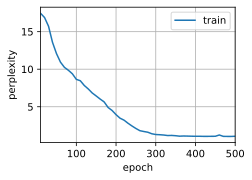

In [10]:
vocab_size, num_hiddens, device = len(vocab), 256, torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_epochs, lr = 500, 1

# model = LSTMScratch(len(vocab), num_hiddens, get_lstm_params, lstm)
# model = LSTMScratch(len(vocab), num_hiddens, get_lstm_params_input_augmented, lstm_input_augmented)
# model = LSTMScratch(len(vocab), num_hiddens, get_lstm_params_minus_forget, lstm_minus_forget)
# model = LSTMScratch(len(vocab), num_hiddens, get_lstm_params_Xavier_init, lstm_Xavier_init)
model = LSTMScratch(len(vocab), num_hiddens, get_lstm_params_choice, lstm_choice)
train(model, train_iter, vocab, lr, num_epochs)

In [11]:
# Add your initial primer strings to this list for testing
sentences = ['time traveller',
             'traveller',
             'machine']

for sentence in sentences:
    print(predict(sentence, 50, model, vocab))

time traveller for so it will be convenient to speak of himwas e
traveller fileding a ling as ure yo aiclane they thichou ab
machine in a ais ofes mory be sandithe meyocaulint ffuche


Summarize the results of your ablation study. What changes did you make? How was the performance affacted? Provide reasoning for your observations. (200-400 words)

In [15]:
section3_ans = 'In the vanilla set-up I used a random normal initialization with sigmoidal activation functions and a single memory cell. This approach leads to a final model perplexity of 2.6.  Next, I augmented the input to the LSTM with the hidden state from the previous time step holding all other parameters such as the activations and parameter initialization constant. This model leads to a perplexity of 1.2. Removing the forget gate with the vanilla settings gives a final perplexity of 4.8. Changing the activation function from a sigmoid to tanh produces a model with a final perplexity of 17.4, the worst so far. Finally, modifying the initialization of parameters from random normal to Xavier gives a perplexity of 1.1. To summarize, a model with a forget gate and augmented inputs, sigmoidal activations, and Xavier initialization leads to a perplexity of 1.1, which while not the outright best is identical to the best so far. (https://colab.research.google.com/drive/1gluclpXm3l0rhuN2mqGw80VW-e8Op_UC?usp=sharing)' #@param {type:"string"}

## Section 4: Know-Your-Pod Better

Discuss with two other members of your pod. What is their favorite movie scene (not just the whole movie, but describe the scene!) of all time? Describe the scene and why they like it so much. (~100 words each)

In [16]:
section4_ans = "Anni's favorite movie is Farewell My Concubine and Jake's is Whiplash. I forgot to write down their favorite scenes unfortunately. Vishnu likes Shawshank Redemption. His favorite scene is when the lead helps the prison guards do their taxes." #@param {type:"string"}

---
# Submission
Once you're done, click on 'Share' and add the link to the box below.


In [17]:
import time
import numpy as np
import urllib.parse
from IPython.display import IFrame

t7 = time.time()

#@markdown #Run Cell to Show Airtable Form
#@markdown ##**Confirm your answers and then click "Submit"**


def prefill_form(src, fields: dict):
  '''
  src: the original src url to embed the form
  fields: a dictionary of field:value pairs,
  e.g. {"pennkey": my_pennkey, "location": my_location}
  '''
  prefill_fields = {}
  for key in fields:
      new_key = 'prefill_' + key
      prefill_fields[new_key] = fields[key]
  prefills = urllib.parse.urlencode(prefill_fields)
  src = src + prefills
  return src



#autofill fields if they are not present
#a missing pennkey and pod will result in an Airtable warning
#which is easily fixed user-side.
try: my_pennkey;
except NameError: my_pennkey = ""

try: my_pod;
except NameError: my_pod = "Select"

try: section1_ans;
except NameError: section1_ans = ""

try: section2_ans;
except NameError: section2_ans = ""

try: section3_ans;
except NameError: section3_ans = ""

try: section4_ans;
except NameError: section4_ans = ""


fields = {"pennkey": my_pennkey,
          "pod": my_pod,
          "section1_ans": section1_ans,
          "section2_ans": section2_ans,
          "section3_ans": section3_ans,
          "section4_ans": section4_ans}

src = "https://airtable.com/shrZdjQjhvUSHVgW5?"


#now instead of the original source url, we do: src = prefill_form(src, fields)
display.display(IFrame(src = prefill_form(src, fields), width = 800, height = 400))

AttributeError: ignored